In [ ]:
# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [ ]:
## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(type(cities))

<class 'list'>


In [ ]:
### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="


# Build query URL
query_url = f"{url}{weather_api_key}&q="


In [4]:
weather_response.head()


NameError: name 'weather_response' is not defined

In [5]:
len(cities)


616

In [6]:
name = []
number = []
lat = []
lng =[]
temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []


# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        print(city)
        weather_response = requests.get(query_url + city).json()
        lat.append(weather_response['coord']['lat'])
        country.append(weather_response['sys']['country'])
        lng.append(weather_response['coord']['lon'])
        temp.append(weather_response['main']['temp'])
        humidity.append(weather_response['main']['humidity'])
        cloudiness.append(weather_response['clouds']['all'])
        wind_speed.append(weather_response['wind']['speed'])
        name.append(weather_response['name'])
        number.append(weather_response['id'])
    except KeyError:
        print("City not valid for some dumb reason")
        
print("Cities Complete")
  
   

albany
kaeo
barrow
carnarvon
qaanaaq
cherskiy
new norfolk
mae hong son
tilichiki
chake chake
castro
havelock
eureka
hobart
arrecife
east london
faya
katsuura
chuy
busselton
bluff
bathsheba
avarua
magadan
narsaq
oleksandrivka
hermanus
longyearbyen
punta arenas
tuktoyaktuk
lebu
mitchell
umzimvubu
City not valid for some dumb reason
khovu-aksy
puerto ayora
shelburne
seryshevo
vaitupu
City not valid for some dumb reason
saint-pierre
sentyabrskiy
City not valid for some dumb reason
georgetown
asau
luderitz
ushuaia
port elizabeth
codrington
marsa matruh
atuona
yeppoon
jining
nileshwar
pisco
taolanaro
City not valid for some dumb reason
aketi
iranshahr
minsk
green river
tiksi
yerbogachen
sorvag
City not valid for some dumb reason
rikitea
meulaboh
mandalgovi
bengkulu
samusu
City not valid for some dumb reason
lagunas
aklavik
mount gambier
lusambo
wajima
muriwai beach
bredasdorp
walvis bay
yellowknife
ballina
mahebourg
cape town
kloulklubed
victor harbor
diamantino
tumannyy
City not valid for s

In [7]:
print(len(name))

572


In [8]:
### Convert Raw Data to DataFrame
weather_dict = {
    "City Name": name,
    "City Number": number,
    "Longitude": lng,
    "Country": country,
    "Latitude": lat,
    "Temperature": temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed
}
weather_df = pd.DataFrame(weather_dict)
weather_df

# * Export the city data into a .csv.
weather_df.to_csv('weather_output.csv')
# * Display the DataFrame

In [9]:
weather_df.head()

,City Name,City Number,Longitude,Country,Latitude,Temperature,Humidity,Cloudiness,Wind Speed
0,Albany,5106841,-73.9662,US,42.6001,80.37,75,60,1.99
1,Kaeo,2189343,173.7833,NZ,-35.1000,57.33,97,32,9.42
2,Barrow,5880054,-156.7887,US,71.2906,44.62,92,90,12.66
3,Carnarvon,2074865,113.6333,AU,-24.8667,51.87,74,0,6.91
4,Qaanaaq,3831208,-69.3632,GL,77.4840,40.53,71,80,5.68


In [ ]:
## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [70]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
weather_df.head()

,City Name,City Number,Latitude,Temperature,Humidity,Cloudiness,Wind Speed
0,Mehamn,778707,71.0357,44.17,86,100,20.33
1,Bredasdorp,1015776,-34.5322,45.72,71,98,6.91
2,Ushuaia,3833367,-54.8000,37.06,65,90,6.91
3,Ponta Delgada,3372783,37.7333,66.92,82,20,3.44
4,Yellowknife,6185377,62.4560,70.92,60,75,1.01


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

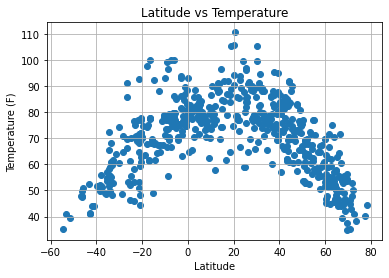

In [15]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Latitude"], weather_df["Temperature"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs Temperature")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Lat_vs_temp_plot")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

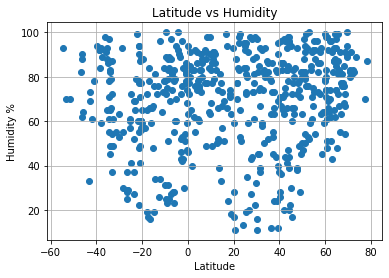

In [16]:
plt.scatter(weather_df["Latitude"], weather_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs Humidity")
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Lat_vs_humidity_plot")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

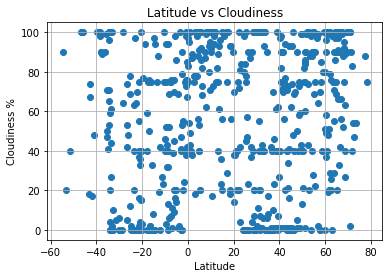

In [17]:
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs Cloudiness")
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Lat_vs_cloudiness_plot")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

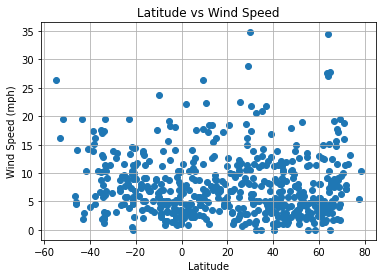

In [18]:
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Lat_vs_windspeed_plot")

# Show plot
plt.show()

## Linear Regression

In [14]:
# Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude):
north_df = weather_df.loc[weather_df['Latitude'] >= 0]
south_df = weather_df.loc[weather_df['Latitude'] < 0]
print(south_df)
print(len(north_df))

                  City Name  City Number  Longitude  Latitude  Temperature  \
3            Saint-Philippe       935215    55.7679  -21.3585        67.59   
4                   Guarujá      3461789   -46.2564  -23.9931        78.73   
5               New Norfolk      2155415   147.0587  -42.7826        41.58   
7                     Bluff      2206939   168.3333  -46.6000        47.80   
9                  Hermanus      3366880    19.2345  -34.4187        61.90   
..                      ...          ...        ...       ...          ...   
530                 Chicama      3698359   -79.1469   -7.8447        68.54   
535                Menongue      3347353    17.6910  -14.6585        57.72   
540  Santa Isabel Rio Negro      3662489   -65.0192   -0.4139        81.05   
543              Launceston      2160517   147.1667  -41.4500        36.81   
547                  Kiunga      2093846   141.2906   -6.1219        71.51   

     Humidity  Cloudiness  Wind Speed  
3          77          

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both factors is -0.7


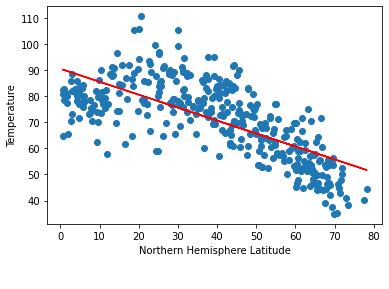

In [28]:
x_values = north_df['Latitude']
y_values = north_df['Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(4,10),fontsize=15,color="red")
plt.xlabel('Northern Hemisphere Latitude')
plt.ylabel('Temperature')
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both factors is 0.75


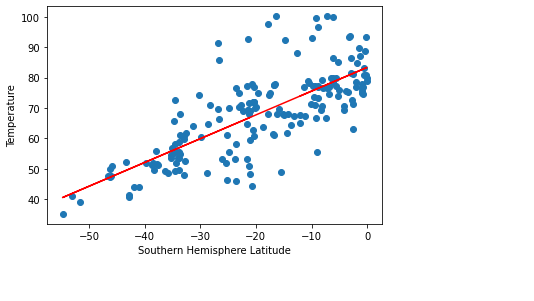

In [29]:
x_values = south_df['Latitude']
y_values = south_df['Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(4,10),fontsize=15,color="red")
plt.xlabel('Southern Hemisphere Latitude')
plt.ylabel('Temperature')
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is 0.09


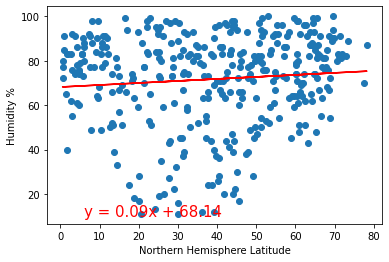

In [30]:
x_values = north_df['Latitude']
y_values = north_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Northern Hemisphere Latitude')
plt.ylabel('Humidity %')
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is -0.09


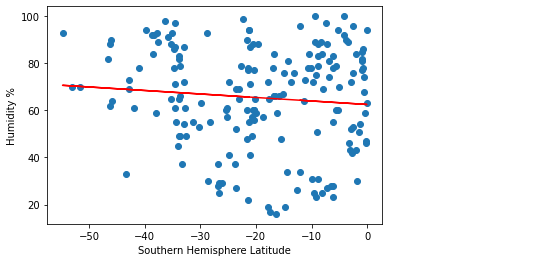

In [31]:
x_values = south_df['Latitude']
y_values = south_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Southern Hemisphere Latitude')
plt.ylabel('Humidity %')
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is 0.02


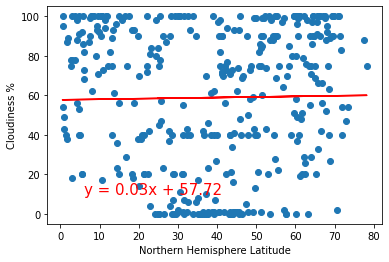

In [32]:
x_values = north_df['Latitude']
y_values = north_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Northern Hemisphere Latitude')
plt.ylabel('Cloudiness %')
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is -0.08


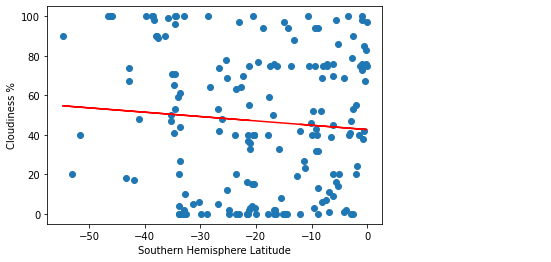

In [33]:
x_values = south_df['Latitude']
y_values = south_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Southern Hemisphere Latitude')
plt.ylabel('Cloudiness %')
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is -0.02


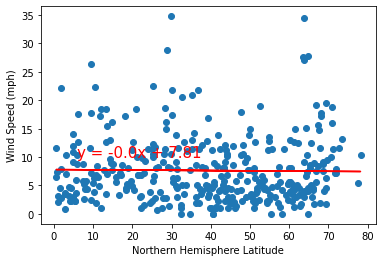

In [34]:
x_values = north_df['Latitude']
y_values = north_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Northern Hemisphere Latitude')
plt.ylabel('Wind Speed (mph)')
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is -0.32


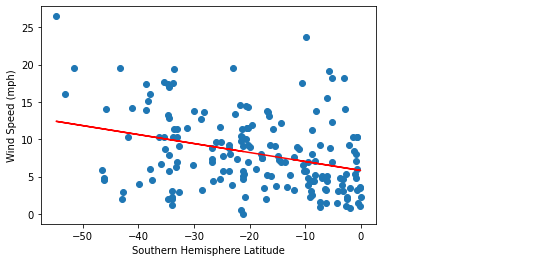

In [35]:
x_values = south_df['Latitude']
y_values = south_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Southern Hemisphere Latitude')
plt.ylabel('Wind Speed (mph)')
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()